In [60]:
# Import Necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

In [61]:
# Loading the dataset
ft = pd.read_csv('spam.csv', encoding = 'latin-1')

# Renaming the type and message columns
ft = ft.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
ft = ft.rename(columns={"v1": 'type', "v2": 'message'})

mark = ft["type"]
texts = ft["message"]

In [62]:
# Display the first 5 rows of the dataset
ft.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
ft.type.value_counts()

ham     4825
spam     747
Name: type, dtype: int64

C:\Users\Cocoritter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


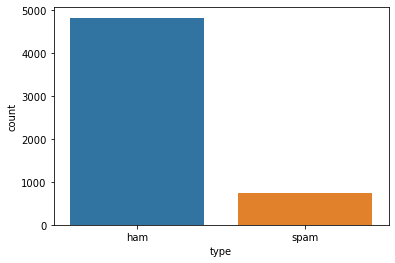

In [64]:
%matplotlib inline

sns.countplot(ft.type)
plt.show()

In [65]:
ft['type'] = ft['type'].map( 
    {'spam': 1, 'ham': 0} )

ft.head()

,type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
# Test and train set libraries for splitting
from sklearn.model_selection import train_test_split

X = ft['message'].values
y = ft['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
# Text processing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [68]:
token = Tokenizer()
token.fit_on_texts(X_train)

In [69]:
# Both training and test dataset applied sequences from dictionary

encoded_train = token.texts_to_sequences(X_train)
encoded_test = token.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [70]:
# Using 8 words padding for both training and testing of dataset

max_length = 8

padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = 'post')
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = 'post')

print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [71]:
# Import the needed libraries for the model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
vocab_size = len(token.word_index) + 1

# Use embedding from Keras to create a deep learning

deep_learning = Sequential()
deep_learning.add(Embedding(vocab_size, 24, input_length = max_length))
deep_learning.add(Flatten())
deep_learning.add(Dense(500, activation='relu'))
deep_learning.add(Dense(200, activation='relu'))
deep_learning.add(Dropout(0.5))
deep_learning.add(Dense(100, activation='relu'))
deep_learning.add(Dense(1, activation='sigmoid'))

In [73]:
# Compiling the model
deep_learning.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
# Summarizing the model
print(deep_learning.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 24)             190920    
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               96500     
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [75]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
deep_learning.fit(x=padded_train,
         y=y_train,
         epochs=50,)

Epoch 1/50
140/140 [==============================] - 1s 3ms/step - loss: 0.1916 - accuracy: 0.9291
Epoch 2/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9836
Epoch 3/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9930
Epoch 4/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9980
Epoch 5/50
140/140 [==============================] - 0s 2ms/step - loss: 4.5652e-04 - accuracy: 0.9998
Epoch 6/50
140/140 [==============================] - 0s 2ms/step - loss: 1.3189e-06 - accuracy: 1.0000
Epoch 7/50
140/140 [==============================] - 0s 3ms/step - loss: 8.7560e-09 - accuracy: 1.0000
Epoch 8/50
140/140 [==============================] - 0s 2ms/step - loss: 2.4610e-09 - accuracy: 1.0000
Epoch 9/50
140/140 [==============================] - 0s 2ms/step - loss: 1.4927e-09 - accuracy: 1.0000
Epoch 10/50
140/140 [==============================] - 0s 2ms/step - loss: 7.082

In [51]:
deep_learning.save("spam_detection_model")

INFO:tensorflow:Assets written to: spam_detection_model\assets


In [52]:
import pickle

with open('spam_detection_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(token, output, pickle.HIGHEST_PROTOCOL)

In [53]:
import tensorflow as tf

model = tf.keras.models.load_model("spam_detection_model")
with open('spam_detection_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [54]:
ft = pd.read_csv('tuna_spam_output.csv', encoding = 'latin-1')
ft.columns=['type', 'messagex']
tf = ft['messagex'].values
ft.head()

,type,messagex
0,1 ham,Feel Yourself That You Are Always Happy.. Slow...
1,2 ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3 ham,Send me yetty's number pls.
3,4 ham,Hey so this sat are we going for the intro pil...
4,5 ham,I got it before the new year cos yetunde said ...


In [55]:
smspredict = token.texts_to_sequences(tf)
smspredict = pad_sequences(smspredict, maxlen=max_length, padding='post')
pred = (model.predict(smspredict) > 0.5).astype("int32").tolist()
print(pred)

1/1 [==============================] - 0s 69ms/step
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0]]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

preds = (deep_learning.predict(padded_test) > 0.5).astype("int32")
accuracy_score(y_test, preds)

35/35 [==============================] - 0s 1ms/step


0.97847533632287

In [57]:
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.97847533632287


In [58]:
smspredict = token.texts_to_sequences(tf)
smspredict = pad_sequences(smspredict, maxlen=max_length, padding='post')
pred = (model.predict(smspredict) > 0.5).astype("int32").tolist()
print(pred)

print('Accuracy:', accuracy_score(y_test, preds))

1/1 [==============================] - 0s 18ms/step
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0]]
Accuracy: 0.97847533632287
